# 1. Data collection

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# 2. Data Preprocessing

Resize images and Normalize pixel values

In [2]:
def preprocess_images(images):
    images_resized = tf.image.resize(images, [80, 80])
    images_normalized = images_resized / 255.0
    return images_normalized


# Preprocess images

In [3]:
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)


# Convert labels to one-hot encoding

In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# Split training data into training and validation sets

In [5]:
val_split = 0.2
val_size = int(len(train_images) * val_split)


In [6]:
val_images = train_images[:val_size]
val_labels = train_labels[:val_size]

In [7]:
train_images = train_images[val_size:]
train_labels = train_labels[val_size:]


In [8]:
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (40000, 80, 80, 3)
Validation images shape: (10000, 80, 80, 3)
Test images shape: (10000, 80, 80, 3)


# 3. Model Building

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input


input_tensor = Input(shape=(80, 80, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Add custom layers on top

In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


# final_model

In [11]:
model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 80, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 80, 80, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 80, 80, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 40, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 40, 40, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 40, 40, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 20, 20, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 20, 20, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 20, 20, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 15,250,250 (58.18 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Model Training

Data augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


# Compile the model

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model

In [15]:

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=16),
    epochs=30,
    validation_data=(val_images, val_labels)
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 177s 66ms/step - accuracy: 0.3894 - loss: 1.6065 - val_accuracy: 0.7744 - val_loss: 0.6584
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.7769 - loss: 0.6594 - val_accuracy: 0.8558 - val_loss: 0.4323
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 156s 62ms/step - accuracy: 0.8423 - loss: 0.4786 - val_accuracy: 0.8680 - val_loss: 0.4003
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 159s 63ms/step - accuracy: 0.8645 - loss: 0.4007 - val_accuracy: 0.8921 - val_loss: 0.3246
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 199s 62ms/step - accuracy: 0.8866 - loss: 0.3359 - val_accuracy: 0.8789 - val_loss: 0.3631
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 203s 63ms/step - accuracy: 0.9000 - loss: 0.2993 - val_accuracy: 0.9078 - val_loss: 0.2823
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 155s 62ms/step - accuracy: 0.9098 - loss: 0.2679 - val_accuracy: 0.9057 - val_loss: 0.2988
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 205s 63ms/step - accuracy: 0.9193 - lo

 # 5. Model Evaluation


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9106 - loss: 0.3907
Test loss: 0.3870
Test accuracy: 0.9101



# Predict labels for the test set

In [17]:
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


# Classification report

In [18]:

print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1000
           1       0.97      0.95      0.96      1000
           2       0.91      0.86      0.88      1000
           3       0.89      0.78      0.83      1000
           4       0.90      0.92      0.91      1000
           5       0.87      0.89      0.88      1000
           6       0.83      0.98      0.90      1000
           7       0.97      0.92      0.94      1000
           8       0.93      0.94      0.93      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Confusion matrix

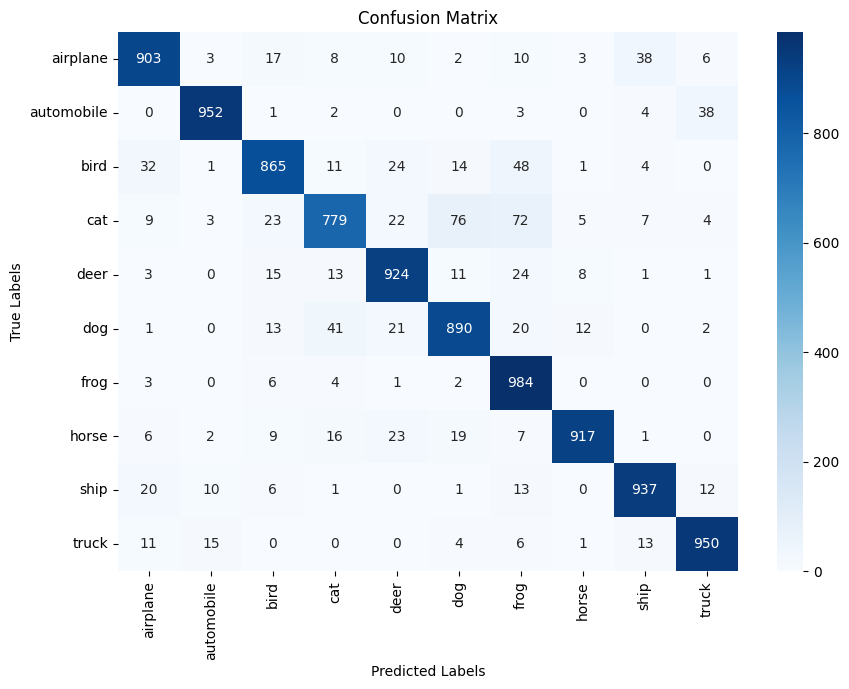

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cm = confusion_matrix(test_true_labels, test_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 6. Model Tuning

Re-train the model

In [20]:

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=10),
    epochs=3
    ,
    validation_data=(val_images, val_labels)
)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4000/4000 ━━━━━━━━━━━━━━━━━━━━ 163s 39ms/step - accuracy: 0.9732 - loss: 0.0812 - val_accuracy: 0.9238 - val_loss: 0.2723
Epoch 2/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 154s 38ms/step - accuracy: 0.9787 - loss: 0.0685 - val_accuracy: 0.9283 - val_loss: 0.2964
Epoch 3/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 199s 38ms/step - accuracy: 0.9812 - loss: 0.0573 - val_accuracy: 0.9210 - val_loss: 0.3151


# 7. Prediction

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
from io import BytesIO
import numpy as np
import requests
import matplotlib.pyplot as plt



# Function for making predictions from an image URL
def predict_from_url(image_url):
    # Load the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((80, 80))  

    # Preprocess the image
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class names for CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class_name = class_names[predicted_class]

    # Print the predicted class number and name
    print(f'Predicted class number: {predicted_class}, class name: {predicted_class_name}')

    # Display the image with the predicted class number and name
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_name} (Class {predicted_class})')
    plt.axis('off')
    plt.show()



# image url for prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class number: 7, class name: horse


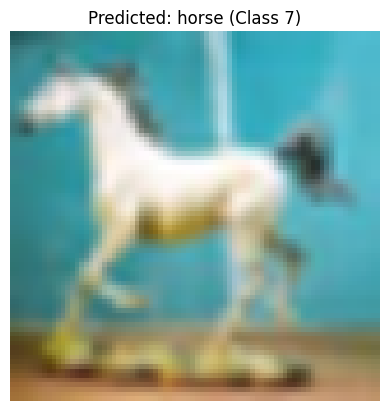

In [27]:

image_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png'
predict_from_url(image_url)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class number: 0, class name: airplane


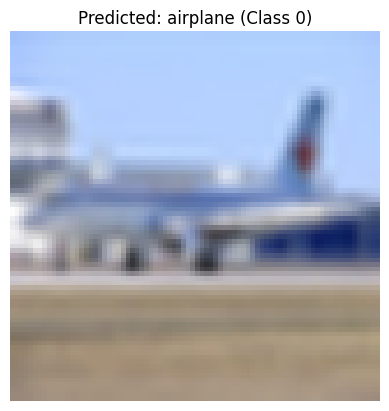

In [28]:

image_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png'
predict_from_url(image_url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class number: 4, class name: deer


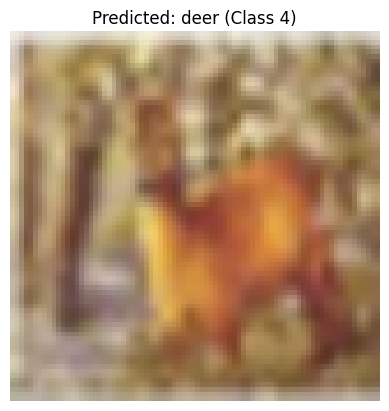

In [29]:

image_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png'
predict_from_url(image_url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted class number: 1, class name: automobile


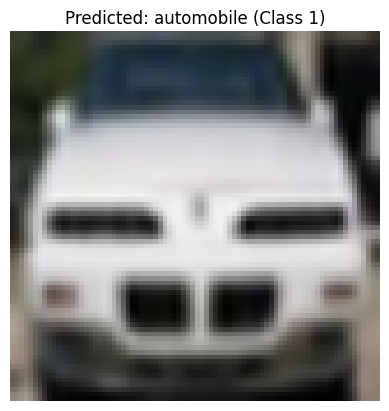

In [30]:
# Example image URL for prediction
image_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png'
predict_from_url(image_url)
